In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('C:\\Users\\power\\Downloads\\HR_analysis.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

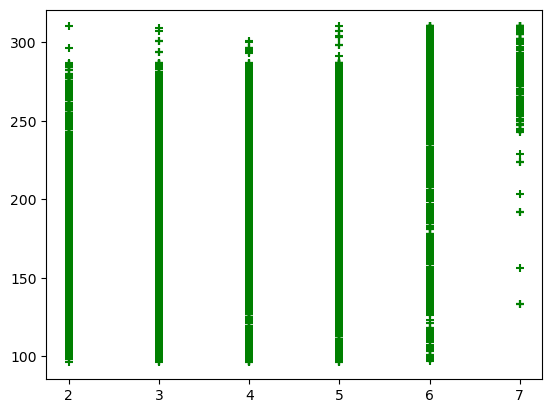

In [17]:
plt.scatter(df.number_project, df.average_montly_hours, marker='+', color='green')

### <span style="color:red">Data visualization and exploring</span>
---

In [21]:
left = df[df.left==1]
left.shape

(3571, 10)

In [22]:
retained = df[df.left==0] # Retained means that employee stay at there(not left from work)
retained.shape

(11428, 10)

### **Average numbers fro all columns**

In [33]:
drop = df.drop(['Department', 'salary'], inplace=False, axis=1)
drop.groupby('left').mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


#### **From this data, we can conclude that :**
- **satisfaction_level** :- satisfaction_level of left employee is **0.44** but retained is **0.66**
- **average_montly_hours** :- average_montly_hoursof lefted employee is **207.41** but retained is just **199**
- **promotion_last_5years** :- Employees who are given promotion are likely to be retained at firm
---

## <span style='color:red'>Impact of salary on employee retention</span>

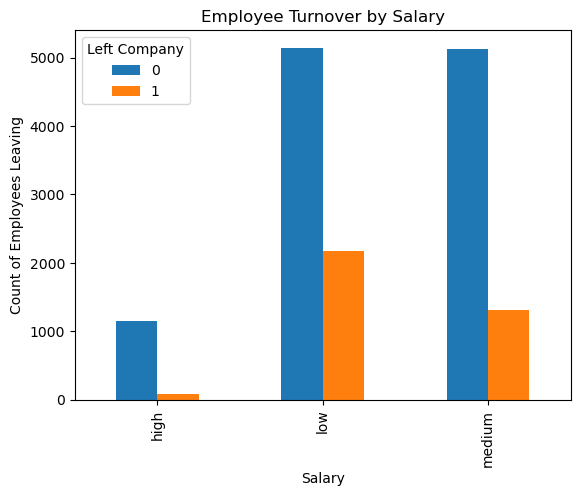

In [36]:
pd.crosstab(df.salary, df.left).plot(kind='bar')
plt.xlabel('Salary')  # Set x-axis label
plt.ylabel('Count of Employees Leaving')  # Set y-axis label (more descriptive)
plt.title('Employee Turnover by Salary')  # Set plot title
plt.legend(title='Left Company')
plt.show()

*Above bar chart shows employees with high salaries are likely to not leave the company*

<Axes: xlabel='Department'>

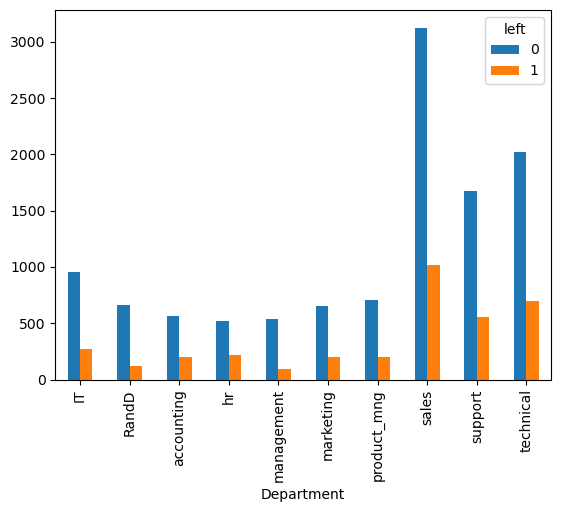

In [41]:
pd.crosstab(df.Department, df.left).plot(kind='bar')

*From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis*

# <span style='color:purple'>From the data analysis so far we can conclude that we will use following variables as independant variables in our model</span>
- satisfaction_level
- average_montly_hours
- Promotion Last 5 Years
- salary*

In [44]:
subdf = df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary']]
subdf.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary
0,0.38,157,0,low
1,0.80,262,0,medium
2,0.11,272,0,medium
3,0.72,223,0,low
4,0.37,159,0,low


### Tackle salary dummy variable
*
Salary has all text data. It needs to be converted to numbers and we will use dummy variable for thas.

In [81]:
salary_dummies = pd.get_dummies(subdf.salary, prefix='salary')
df_with_dummies = pd.concat([subdf, salary_dummies], axis=1)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,salary_high,salary_low,salary_medium
0,0.38,157,0,low,False,True,False
1,0.80,262,0,medium,False,False,True
2,0.11,272,0,medium,False,False,True
3,0.72,223,0,low,False,True,False
4,0.37,159,0,low,False,True,False


In [82]:
df_with_dummies.drop('salary', axis='columns', inplace=True)
df_with_dummies.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False


In [83]:
x = df_with_dummies
x.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,False,True,False
1,0.80,262,0,False,False,True
2,0.11,272,0,False,False,True
3,0.72,223,0,False,True,False
4,0.37,159,0,False,True,False


In [84]:
y = df.left
y.head()

0    1
1    1
2    1
3    1
4    1
Name: left, dtype: int64

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.3)

In [94]:
from sklearn.linear_model import LogisticRegression

In [95]:
model = LogisticRegression()

In [97]:
model.fit(x_train, y_train)

LogisticRegression()

In [98]:
model.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

### Accuracy of model

In [99]:
model.score(x_test, y_test)

0.7743809523809524